In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Store results
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "AdaGrad": Adagrad(learning_rate=0.01),
    "RMSProp": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001)
}

In [4]:
histories = {}

In [5]:
# Loop through each optimizer
for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer...")

    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                        validation_data=(x_test, y_test), verbose=0)

    histories[name] = history


Training with SGD optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training with Momentum optimizer...

Training with AdaGrad optimizer...

Training with RMSProp optimizer...

Training with Adam optimizer...


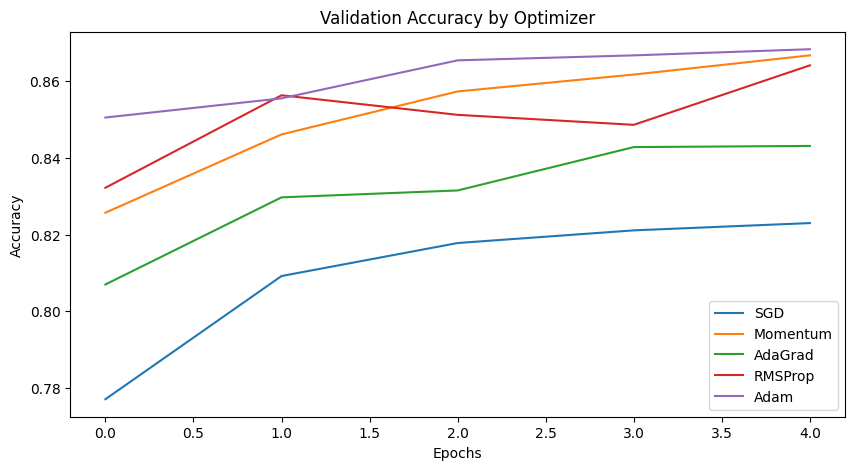

In [6]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title("Validation Accuracy by Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

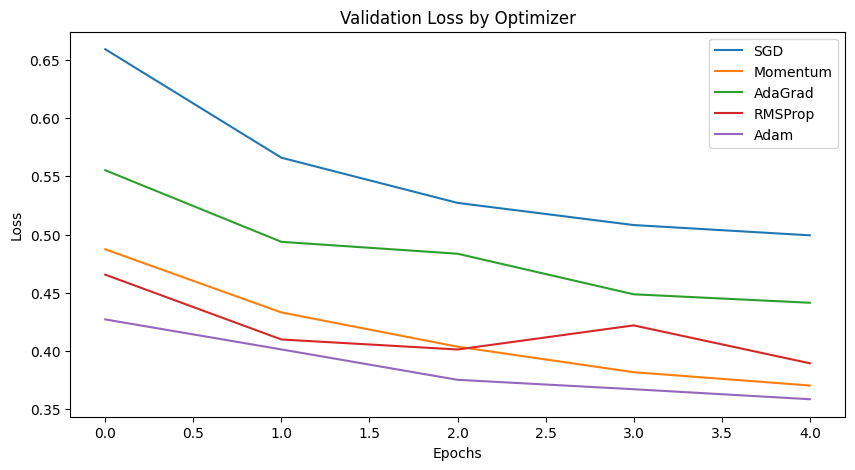

In [7]:
# Plot loss comparison
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)
plt.title("Validation Loss by Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()